In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Hypothesis Representation

$$\boxed{h_θ(x) = g(θ^{T}x) = g(\theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n)}$$

### Sigmoid function (Logistic Function)
$$\boxed{
g(z) = \frac{1}{1 + e^{-z}}
}$$
$z = θ^{T}x$

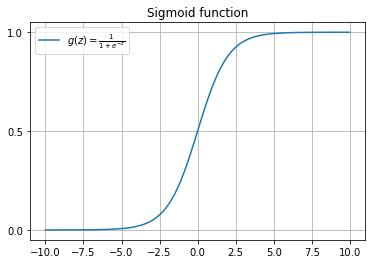

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X_sig = np.linspace(-10, 10, 100)
Y_sig = sigmoid(X_sig)

plt.title('Sigmoid function')
plt.plot(X_sig, Y_sig, label=r'$g(z) = \frac{1}{1 + e^{-z}}$')
plt.yticks([0, 0.5, 1])
plt.legend()
plt.grid()
plt.show()

In [3]:
def hypothesis(x, theta):
    return sigmoid(x.dot(theta))

### Cost Function

$$
Cost(h(x), y) = 
    \begin{cases} 
        -\log(h_θ(x)),     & y = 1 \\
        -\log(1 - h_θ(x)), & y = 0 
    \end{cases}
$$

$$\boxed{Cost(h(x), y) = - y\log(h_θ(x)) -(1−y)\log(1 - h_θ(x))}$$

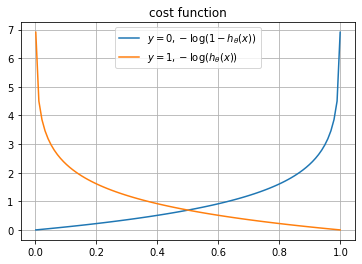

In [4]:
x_cost = np.linspace(0.001, 0.999, 100)
y_cost0 = [-np.log(1 - x) for x in x_cost]
y_cost1 = [-np.log(x) for x in x_cost]

plt.title('cost function')
plt.plot(x_cost, y_cost0, label='$y = 0, -\log(1 - h_θ(x))$')
plt.plot(x_cost, y_cost1, label='$y = 1, -\log(h_θ(x))$')
plt.legend()
plt.grid()
plt.show()

In [5]:
def cost(theta,X,Y):
    h = hypothesis(X,theta)
    return -(np.transpose(Y).dot(np.log(h)) + np.transpose(1-Y).dot(np.log(1-h)))/len(X)

## Gradient Descent
Repeat{
\begin{equation*}
θ_j := θ_j - \frac{α}{n} \left( \sum_{k=1}^n ((h_θ(x^i) - y^i)x_j)\right)
\end{equation*}
}

A vectorized implementation is:
\begin{equation*}
θ := θ - \frac{α}{n} X^T(g(Xθ) - y)
\end{equation*}

In [6]:
def gradient_descent(theta,X,Y):
    alpha = 2
    for _ in range(1000):
        theta = theta - (alpha / len(X)) * np.transpose(X).dot(sigmoid(X.dot(theta)) - Y)
    return theta

## One vs All Classifier


In [7]:
def onevsall(theta, X, Y, selected):
    Y_select = Y.copy()
    Y_select[Y == selected] = 1
    Y_select[Y != selected] = 0
    return gradient_descent(theta, X, Y_select)

def train_theta(theta, X, Y):
    theta_res = []
    for i in Y:
        theta_res.append(onevsall(theta, X, Y, i))
    return theta_res